# Global Economic Indicators Analysis – Notebook 02_analysis

This notebook performs in-depth analysis of global economic indicators including GDP, Inflation, and Unemployment Rate.

The goals are:
- Explore trends over years globally and per country
- Calculate rolling averages and percentage changes to highlight dynamics
- Visualize key insights using line plots, bar charts, and correlation heatmaps

All code cells include comments in English for clarity.


In [1]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Optional: make plots look nicer
sns.set_style("whitegrid")

In [8]:
# --------------------------
# Load cleaned / raw data
# --------------------------

data_path = "../data/raw/dataset.csv"
df = pd.read_csv(data_path)

# Quick look

display(df.head())
display(df.info())
print(df.columns.tolist())


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    1820 non-null   float64
 12  Government Revenue (

None

['country_name', 'country_id', 'year', 'Inflation (CPI %)', 'GDP (Current USD)', 'GDP per Capita (Current USD)', 'Unemployment Rate (%)', 'Interest Rate (Real, %)', 'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)', 'Current Account Balance (% GDP)', 'Government Expense (% of GDP)', 'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)', 'Gross National Income (USD)', 'Public Debt (% of GDP)']


In [7]:
# --------------------------
# Basic checks
# --------------------------

# Check missing values
display(df.isnull().sum())

# Convert 'Year' to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

country_name                          0
country_id                            0
year                                  0
Inflation (CPI %)                   778
GDP (Current USD)                   539
GDP per Capita (Current USD)        534
Unemployment Rate (%)               677
Interest Rate (Real, %)            1737
Inflation (GDP Deflator, %)         568
GDP Growth (% Annual)               560
Current Account Balance (% GDP)     909
Government Expense (% of GDP)      1652
Government Revenue (% of GDP)      1643
Tax Revenue (% of GDP)             1639
Gross National Income (USD)         676
Public Debt (% of GDP)             2620
dtype: int64

In [10]:
df.rename(columns={
    'country_name': 'Country',
    'country_id': 'Country_ID',
    'year': 'Year',
    'Inflation (CPI %)': 'Inflation_CPI',
    'GDP (Current USD)': 'GDP',
    'GDP per Capita (Current USD)': 'GDP_per_Capita',
    'Unemployment Rate (%)': 'Unemployment_Rate',
    'Interest Rate (Real, %)': 'Interest_Rate',
    'Inflation (GDP Deflator, %)': 'Inflation_GDP_Deflator',
    'GDP Growth (% Annual)': 'GDP_Growth',
    'Current Account Balance (% GDP)': 'Current_Account',
    'Government Expense (% of GDP)': 'Gov_Expense',
    'Government Revenue (% of GDP)': 'Gov_Revenue',
    'Tax Revenue (% of GDP)': 'Tax_Revenue',
    'Gross National Income (USD)': 'GNI',
    'Public Debt (% of GDP)': 'Public_Debt'
}, inplace=True)


In [12]:
# --------------------------
# Country-level summary
# --------------------------

# Average GDP per country
country_gdp = df.groupby("Country")["GDP"].mean().sort_values(ascending=False)
display(country_gdp.head(10))

# Average Unemployment Rate and Inflation per country
country_unemp = df.groupby("Country")["Unemployment_Rate"].mean()
country_infl = df.groupby("Country")["Inflation_CPI"].mean()


Country
United States         1.993306e+13
China                 1.237015e+13
Japan                 5.104524e+12
Germany               3.884012e+12
United Kingdom        2.861489e+12
France                2.738970e+12
India                 2.469549e+12
Italy                 2.084946e+12
Brazil                2.067362e+12
Russian Federation    1.808548e+12
Name: GDP, dtype: float64

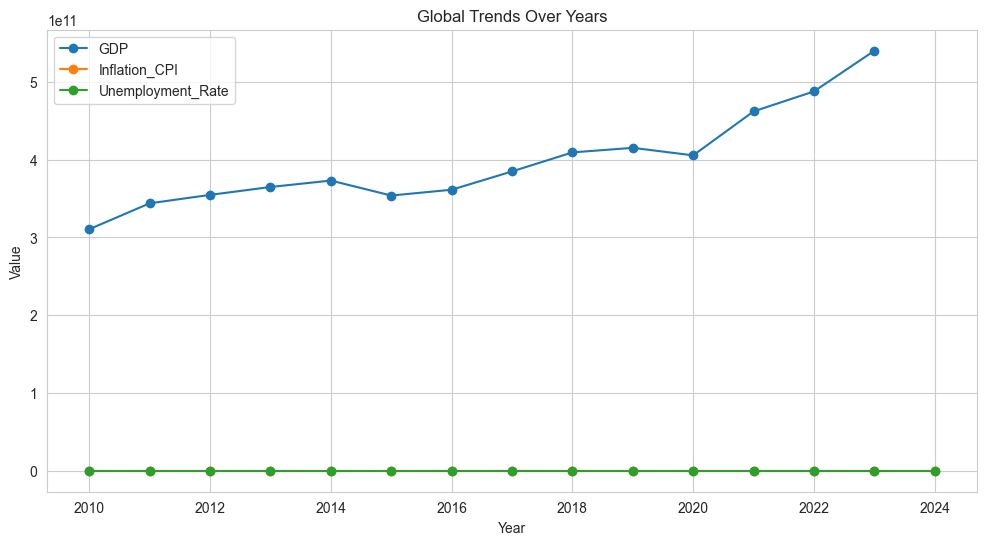

In [27]:
# --------------------------
# Global trend over years
# --------------------------

# Use correct column names
global_trends = df.groupby("Year")[["GDP", "Inflation_CPI", "Unemployment_Rate"]].mean()

# Line plot for global trends
global_trends.plot(figsize=(12,6), marker='o')
plt.title("Global Trends Over Years")
plt.ylabel("Value")
plt.show()


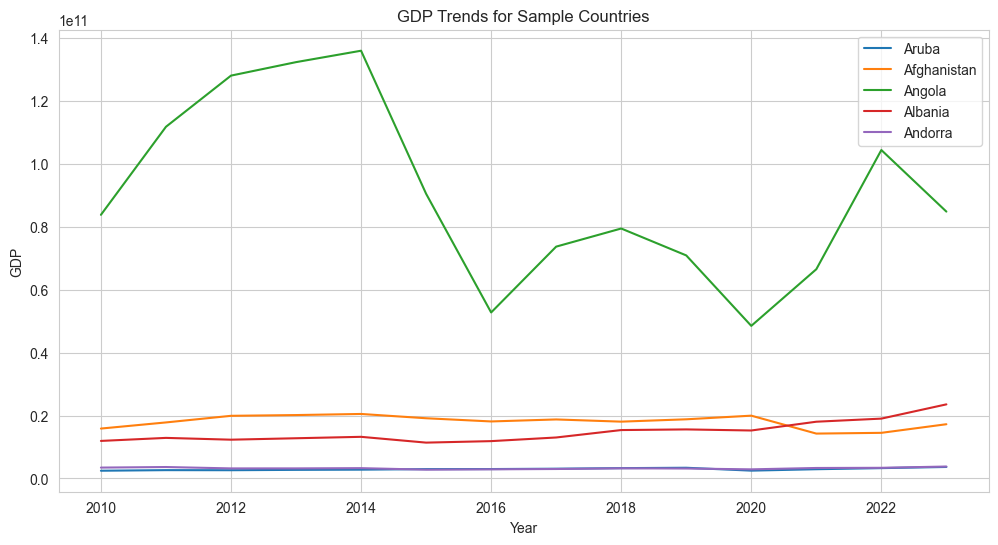

In [15]:
# --------------------------
# Sample country trends
# --------------------------

sample_countries = df['Country'].unique()[:5]  # first 5 countries
plt.figure(figsize=(12,6))
for country in sample_countries:
    subset = df[df['Country'] == country]
    plt.plot(subset['Year'], subset['GDP'], label=country)
plt.title("GDP Trends for Sample Countries")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.show()

In [28]:
# --------------------------
# Rolling averages and percentage change
# --------------------------

# Sort by country and year
df_sorted = df.sort_values(["Country", "Year"])

# 3-year rolling mean for GDP
df_sorted['GDP_rolling3'] = df_sorted.groupby("Country")["GDP"].transform(
    lambda x: x.rolling(3).mean()
)

# Percentage change per year for GDP
df_sorted['GDP_pct_change'] = df_sorted.groupby("Country")["GDP"].transform(
    lambda x: x.pct_change(fill_method=None) * 100
)




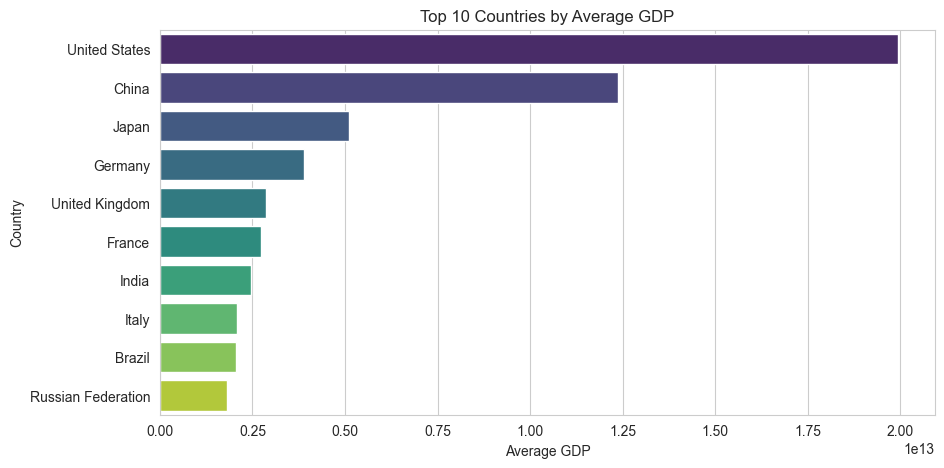

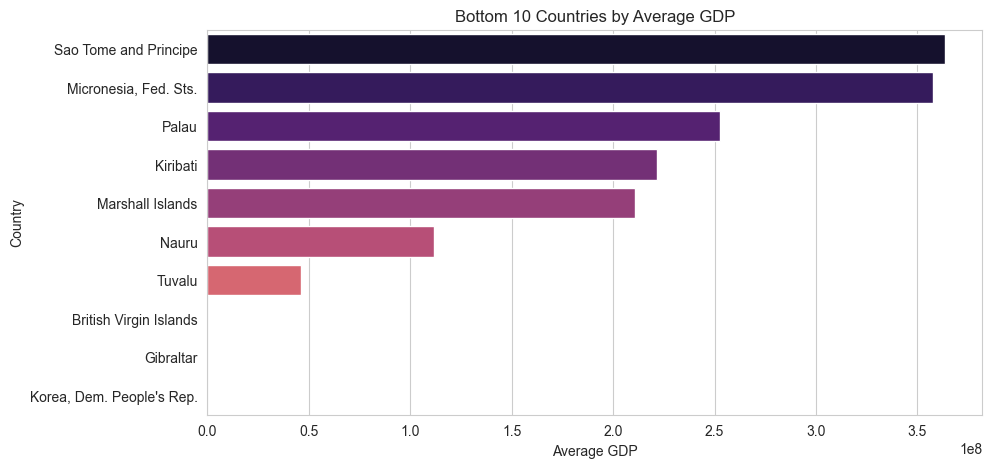

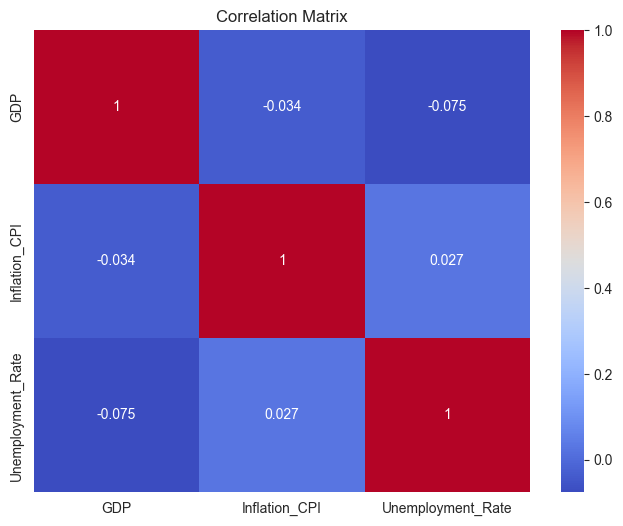

In [29]:
# --------------------------
# Visualizations
# --------------------------

# Top 10 countries by GDP (average)
top10_gdp = country_gdp.head(10)
plt.figure(figsize=(10,5))
sns.barplot(
    x=top10_gdp.values,
    y=top10_gdp.index,
    hue=top10_gdp.index,  # set y as hue
    dodge=False,           # bars not side by side
    palette="viridis",
    legend=False           # remove legend
)
plt.title("Top 10 Countries by Average GDP")
plt.xlabel("Average GDP")
plt.ylabel("Country")
plt.show()

# Bottom 10 countries by GDP (average)
bottom10_gdp = country_gdp.tail(10)  # en düşük 10 ülke
plt.figure(figsize=(10,5))
sns.barplot(
    x=bottom10_gdp.values,
    y=bottom10_gdp.index,
    hue=bottom10_gdp.index,  # set y as hue
    dodge=False,             # bars not side by side
    palette="magma",         # farklı bir renk paleti
    legend=False              # remove legend
)
plt.title("Bottom 10 Countries by Average GDP")
plt.xlabel("Average GDP")
plt.ylabel("Country")
plt.show()


# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    df[["GDP", "Inflation_CPI", "Unemployment_Rate"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()


# --------------------------
# Quick Insights Placeholder
# --------------------------
# Here you can add your observations:
# - Which countries have the highest/lowest GDP?
# - How are Unemployment Rate and Inflation related?
# - Any interesting trends over time?